# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

* Cloudiness throughtout all of the hemispheres is spread out equally at an lattitude point

* Max Temperature in the world decreases as you move pass 0 lattidute

* Souther hemisphere temp increases as you move pass 0 lattitude as Nothern hemisphere decreases

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude#
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : busselton
Processing Record 2 of Set 1 : upernavik
Processing Record 3 of Set 1 : plumlov
Processing Record 4 of Set 1 : mataura
Processing Record 5 of Set 1 : kruisfontein
City not found. Skipping...
Processing Record 6 of Set 1 : barrow
Processing Record 7 of Set 1 : yellowknife
Processing Record 8 of Set 1 : hilo
Processing Record 9 of Set 1 : manokwari
Processing Record 10 of Set 1 : mokobeng
Processing Record 11 of Set 1 : bereda
Processing Record 12 of Set 1 : cherskiy
Processing Record 13 of Set 1 : avarua
Processing Record 14 of Set 1 : tiksi
Processing Record 15 of Set 1 : najran
Processing Record 16 of Set 1 : ushtobe
Processing Record 17 of Set 1 : rikitea
Processing Record 18 of Set 1 : valladolid
Processing Record 19 of Set 1 : ushuaia
City not found. Skipping...
Processing Record 20 of Set 1 : atuona
Processing Record 21 of Set 1 : sao joao da barra
City not found. Skipping...
Processin

Processing Record 30 of Set 4 : shimoda
Processing Record 31 of Set 4 : oneonta
Processing Record 32 of Set 4 : alofi
Processing Record 33 of Set 4 : luwuk
Processing Record 34 of Set 4 : grand gaube
Processing Record 35 of Set 4 : magadan
Processing Record 36 of Set 4 : mount isa
Processing Record 37 of Set 4 : kailua
City not found. Skipping...
Processing Record 38 of Set 4 : haverfordwest
Processing Record 39 of Set 4 : verkhnyaya inta
Processing Record 40 of Set 4 : dingle
Processing Record 41 of Set 4 : mahebourg
Processing Record 42 of Set 4 : bambous virieux
Processing Record 43 of Set 4 : clyde river
Processing Record 44 of Set 4 : mitsamiouli
Processing Record 45 of Set 4 : chokurdakh
Processing Record 46 of Set 4 : la peca
Processing Record 47 of Set 4 : souillac
Processing Record 48 of Set 4 : andilamena
Processing Record 49 of Set 4 : hofn
Processing Record 50 of Set 4 : broome
Processing Record 0 of Set 5 : erenhot
Processing Record 1 of Set 5 : margate
Processing Record 2

Processing Record 14 of Set 8 : goderich
Processing Record 15 of Set 8 : okhotsk
City not found. Skipping...
Processing Record 16 of Set 8 : college
Processing Record 17 of Set 8 : bacum
Processing Record 18 of Set 8 : touros
Processing Record 19 of Set 8 : dalvik
Processing Record 20 of Set 8 : dorado
Processing Record 21 of Set 8 : noyabrsk
Processing Record 22 of Set 8 : walvis bay
City not found. Skipping...
Processing Record 23 of Set 8 : awjilah
Processing Record 24 of Set 8 : khani
Processing Record 25 of Set 8 : daru
Processing Record 26 of Set 8 : houma
Processing Record 27 of Set 8 : udimskiy
Processing Record 28 of Set 8 : yumen
Processing Record 29 of Set 8 : cambridge
Processing Record 30 of Set 8 : sjenica
City not found. Skipping...
Processing Record 31 of Set 8 : maldonado
Processing Record 32 of Set 8 : gujan-mestras
Processing Record 33 of Set 8 : waddan
Processing Record 34 of Set 8 : madarounfa
Processing Record 35 of Set 8 : boa vista
Processing Record 36 of Set 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a panda data frame using data retrieved
weather_data = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:
# Count data
weather_data.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [8]:
# Display the Data Frame
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,9,AU,1603329641,66,-33.65,115.33,60.01,3.00
1,Upernavik,62,GL,1603329641,95,72.79,-56.15,23.99,4.34
2,Plumlov,0,CZ,1603329642,93,49.47,17.02,44.60,3.36
3,Mataura,86,NZ,1603329642,49,-46.19,168.86,66.00,5.01
4,Kruisfontein,0,ZA,1603329642,67,-34.00,24.73,55.22,5.84
...,...,...,...,...,...,...,...,...,...
536,Beringovskiy,86,RU,1603329807,77,63.05,179.32,41.23,7.00
537,Şile,87,TR,1603329807,87,41.18,29.61,60.80,4.70
538,Suntar,0,RU,1603329807,94,62.14,117.63,15.78,3.94
539,Dosso,0,NE,1603329743,34,13.05,3.19,82.85,6.40


In [9]:
# Save city data into a csv file
weather_data.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

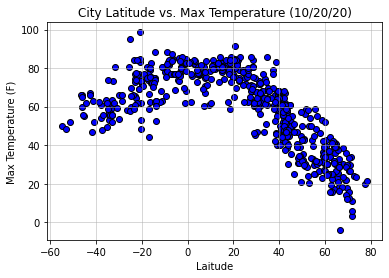

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (10/20/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

* The code shows that the farther right or postive you are in lattitude the lower your max temp is 

## Latitude vs. Humidity Plot

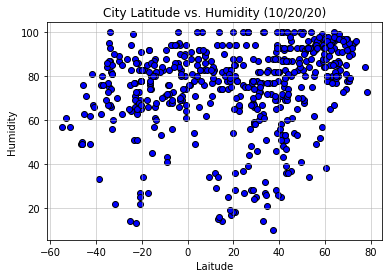

In [33]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (10/20/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

* Code shows that humidiy is irrelevant when it comes to latitude as it is spread out equally

## Latitude vs. Cloudiness Plot

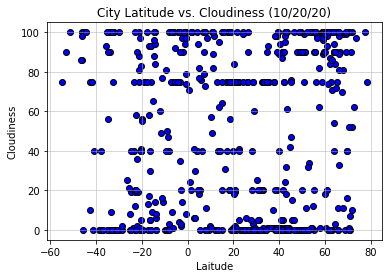

In [34]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (10/20/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

* Code shows that Cloudiness is spread out equally throughout diffrenet points in the lattitude location

## Latitude vs. Wind Speed Plot

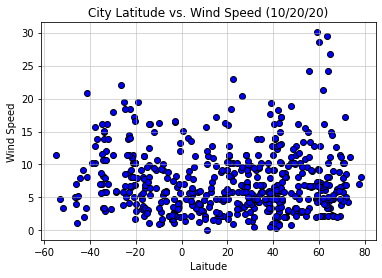

In [35]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (10/20/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

* Code shows the farther right in latitude you are, the more likely you are to have wind

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [17]:
# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


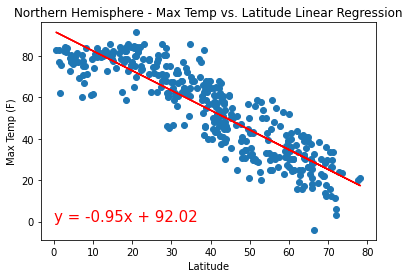

In [18]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

* Graphs shows that there is a negative correaltoin between max temp and lattitude for the Northern Hempisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.66


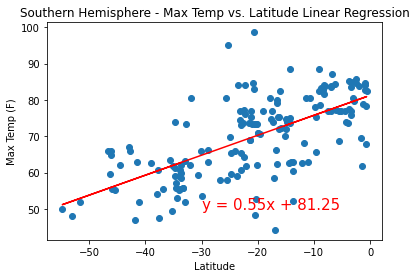

In [19]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

* Southern Hempisphere has a postive correalation between lattitute and max temp as you move closer to 0

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.27


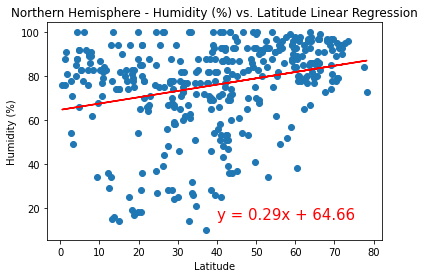

In [20]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


* Northern Hemisphere has a small postivie increase in humidity as you move away from 0

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.23


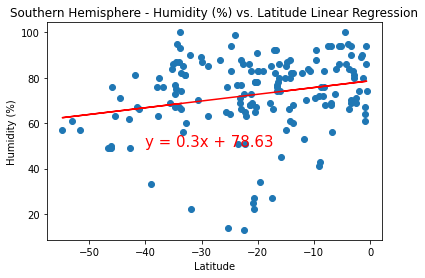

In [21]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

* Southeren Hemispehere has a higher correaltation for thatn the nothern hemisphere

* Souther Hemisphere also has a small postive correlation for humidity as you move closer to 0 lattitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


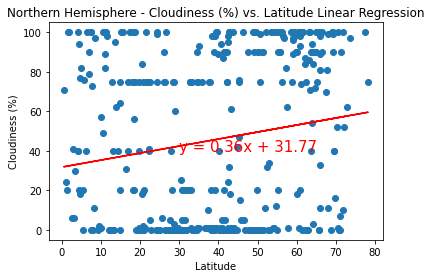

In [22]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

* Nothern Hemispheres has a scattered plots for cloudiness throughout

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.09


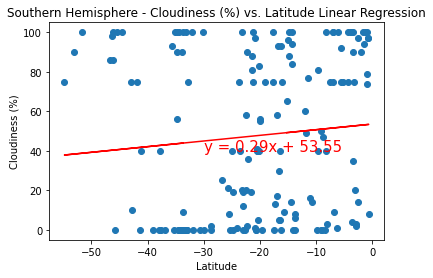

In [23]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

* Southern Hemisphere starts to show scattered cloudiness as you move pass the -30 lattitude cordinates

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.11


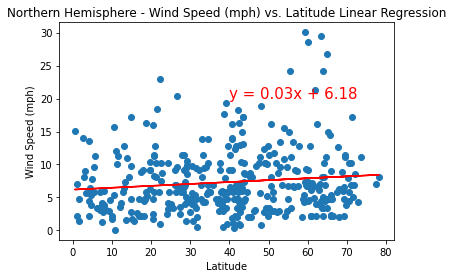

In [24]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

* Nothern Hemispheres has a scattered plots for windspeed throughout, all of which are equally spread out

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.21


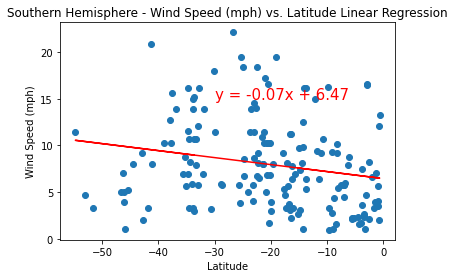

In [25]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

* Southern Hemisphere starts to shows some scattered wind as you move pass lattitude with higher speeds seen at around the -35 lattitude cordinates